In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Importare le librerie necessarie
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
dataset = pd.read_csv("all_data.csv")

In [35]:
dataset = dataset.drop(columns = ['Settore prevalente', 'Tempo permanenza (min)', 'Durata calma (min)'])

## Pressione prevista domani

In [36]:
dataset['Pressione prevista domani'] = dataset['Valore pressione'].shift(-1)
dataset['Precipitazione prevista domani'] = dataset['Precipitazione (mm)'].shift(-1)
dataset['Temperatura prevista domani'] = dataset['Temperatura media (°C)'].shift(-1)
dataset['Umidità prevista domani'] = dataset['Umidità media (%)'].shift(-1)
dataset['Vento previsto domani'] = dataset['Velocità media (m/s)'].shift(-1)

In [37]:
dataset = dataset.dropna()

In [38]:
dataset['Stagione'] = dataset['Stagione'].map({  # We associate a number with each type of vehicle
    'Inverno': 0,
    'Primavera': 1,
    'Estate' : 2,
    'Autunno' : 3
})

R^2 Score: 0.7073287172402771


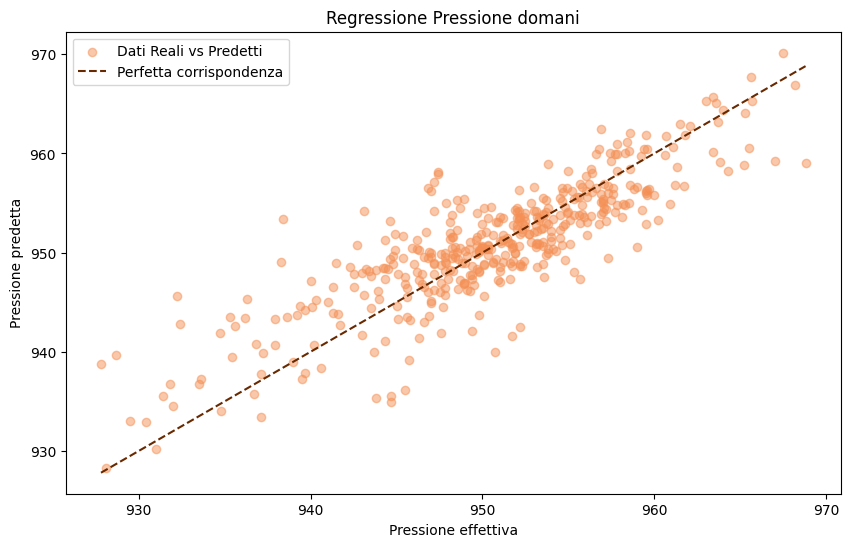

In [39]:
X = dataset.drop(columns = ['DATA', 'Pressione prevista domani'])
y = dataset['Pressione prevista domani'] #target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
modelPress = LinearRegression()
modelPress.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = modelPress.predict(X_test)


print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Pressione effettiva")
plt.ylabel("Pressione predetta")
plt.title("Regressione Pressione domani")
plt.legend()
plt.savefig('regressionePressione.png', dpi = 180, bbox_inches = 'tight')
plt.show()

In [40]:
import pickle

with open('pressione_prev.pkl', 'wb') as f:
    pickle.dump(modelPress, f) 

## Temperatura prevista domani

In [41]:
dataset = dataset.dropna()

R^2 Score: 0.959020042547005


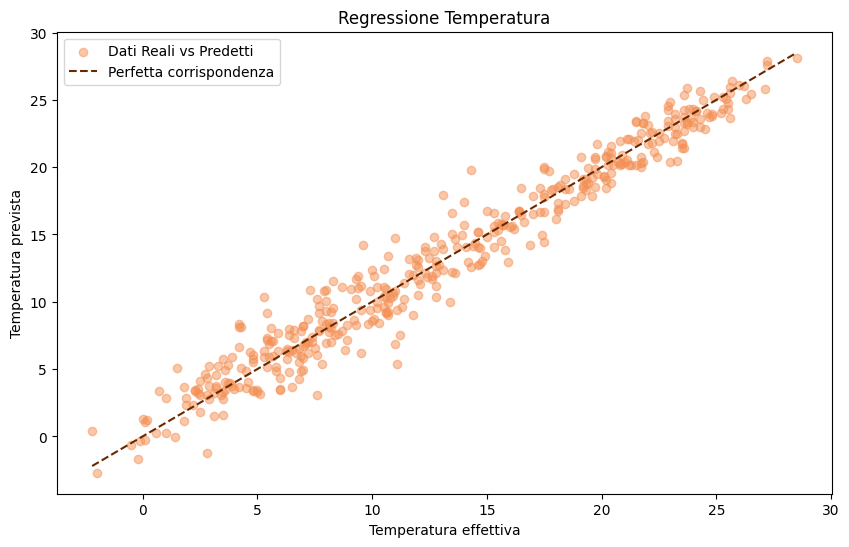

In [42]:
X = dataset.drop(columns = ['DATA', 'Temperatura prevista domani'])
y = dataset['Temperatura prevista domani'] #target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
modelTemp = LinearRegression()
modelTemp.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = modelTemp.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Temperatura effettiva")
plt.ylabel("Temperatura prevista")
plt.title("Regressione Temperatura")
plt.legend()
plt.savefig('regressioneTemperatura.png', dpi = 180, bbox_inches = 'tight')
plt.show()

In [43]:
import pickle

with open('temperatura_prev.pkl', 'wb') as f:
    pickle.dump(modelTemp, f)

## Previsione umidità domani

R^2 Score: 0.7263925802442948


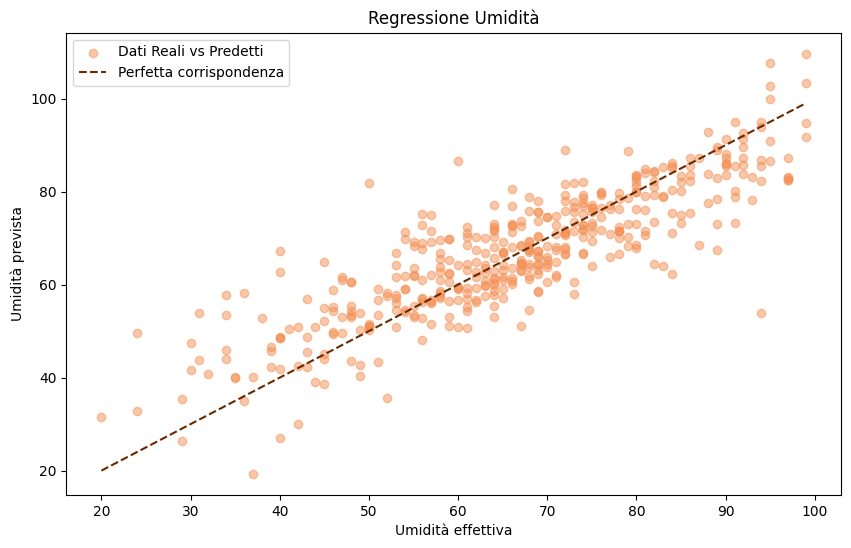

In [44]:
X = dataset.drop(columns = ['DATA', 'Umidità prevista domani'])
y = dataset['Umidità prevista domani'] #target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
modelUmid = LinearRegression()
modelUmid.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = modelUmid.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Umidità effettiva")
plt.ylabel("Umidità prevista")
plt.title("Regressione Umidità")
plt.legend()
plt.savefig('regressioneUmidità.png', dpi = 180, bbox_inches = 'tight')
plt.show()

In [45]:
import pickle

with open('umidita_prev.pkl', 'wb') as f:
    pickle.dump(modelUmid, f)

## Precipitazioni previste domani

R^2 Score: 0.17839239390080897


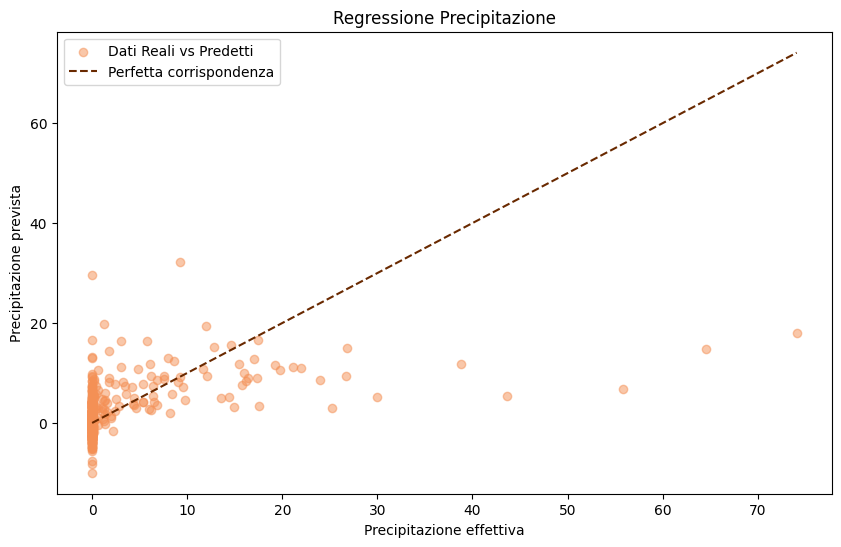

In [46]:
X = dataset.drop(columns = ['DATA', 'Precipitazione prevista domani'])
y = dataset['Precipitazione prevista domani'] #target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
modelPrec = LinearRegression()
modelPrec.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = modelPrec.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Precipitazione effettiva")
plt.ylabel("Precipitazione prevista")
plt.title("Regressione Precipitazione")
plt.legend()
plt.savefig('regressionePrecipitazione.png', dpi = 180, bbox_inches = 'tight')
plt.show()

In [15]:
import pickle

with open('precip_prev.pkl', 'wb') as f:
    pickle.dump(modelPrec, f)

## Vento previsto domani

R^2 Score: 0.5557116471016798


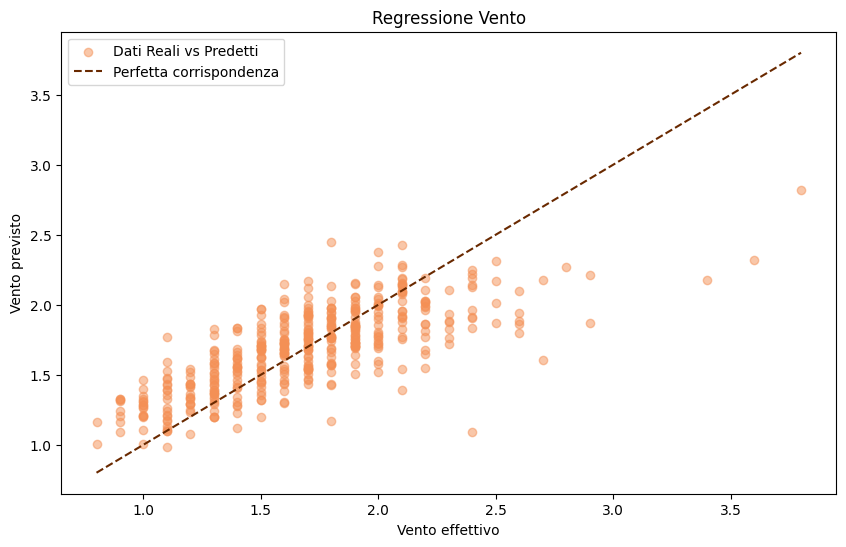

In [16]:
X = dataset.drop(columns = ['DATA', 'Vento previsto domani'])
y = dataset['Vento previsto domani'] #target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
modelVento = LinearRegression()
modelVento.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = modelVento.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Vento effettivo")
plt.ylabel("Vento previsto")
plt.title("Regressione Vento")
plt.legend()
plt.savefig('regressioneVento.png', dpi = 180, bbox_inches = 'tight')
plt.show()

In [17]:
import pickle

with open('vento_prev.pkl', 'wb') as f:
    pickle.dump(modelVento, f)